In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM,Input
import datetime

In [2]:
data = pd.read_csv('Google_Stock_Price_Train.csv')
print(data.head())
X = data['Open'].values
X = X.reshape(-1,1)
print(X.shape)

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
(1258, 1)


In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)


#create data structure with 60 timesteps and 1 output
X_train= []
y_train = []

for i in range(60,len(X_scaled)):
    X_train.append(X_scaled[i-60:i,0])
    y_train.append(X_scaled[i,0])



In [4]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]))
y_train = np.reshape(y_train,(-1,1))
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198, 1)


In [5]:
lstm_model = Sequential([
    LSTM(units= 128 , return_sequences=True, input_shape=(X_train.shape[1],1) ),
    Dropout(0.4),
    LSTM(units=265, return_sequences=True),
    Dropout(0.4),
    LSTM(units=265, return_sequences=True),
    Dropout(0.4),
    LSTM(units=265),
    Dense(units=1),
])

lstm_model.compile(optimizer='adam', loss='mse')
history_lstm=lstm_model.fit(x=X_train, y=y_train, epochs=100, verbose=1)


Epoch 1/100
38/38 [==============================] - 12s 41ms/step - loss: 0.0723
Epoch 2/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0036
Epoch 3/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0027
Epoch 4/100
38/38 [==============================] - 1s 38ms/step - loss: 0.0028
Epoch 5/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0024
Epoch 6/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0024
Epoch 7/100
38/38 [==============================] - 1s 38ms/step - loss: 0.0029
Epoch 8/100
38/38 [==============================] - 1s 38ms/step - loss: 0.0022
Epoch 9/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0022
Epoch 10/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0021
Epoch 11/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0022
Epoch 12/100
38/38 [==============================] - 1s 38ms/step - loss: 0.0023
Epoch 13/100
38/38 [====

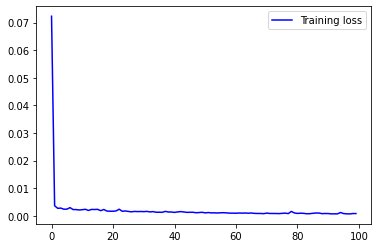

In [6]:
plt.plot(history_lstm.history['loss'], color='b', label='Training loss')
plt.legend()

In [7]:
mlp_model = Sequential([
    Input(X_train.shape[1]),
    Dense(120,activation='relu'),
    Dropout(0.4),
    Dense(1)
])
mlp_model.compile(optimizer='adam', loss='mse')
history_mlp=mlp_model.fit(x=X_train, y=y_train, epochs=100, verbose=1)

Epoch 1/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0730
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0171
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0084
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0082
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 7/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0081
Epoch 8/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 9/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 10/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 11/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 12/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 13/100
38/38 [=================

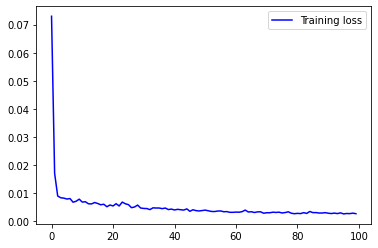

In [8]:
plt.plot(history_mlp.history['loss'], color='b', label='Training loss')
plt.legend()

In [9]:
test=pd.read_csv('Google_Stock_Price_Test.csv')
test['Date'] = pd.to_datetime(test['Date'])


ALL = pd.concat((data,test),axis=0)
ALL['Date'] = pd.to_datetime(ALL['Date'])
ALL = ALL[ALL['Date']>=datetime.datetime(2016,10,1)]
ALL=ALL.iloc[:,0:2]

input= ALL[len(ALL)-len(test)-60:]

input=input['Open'].values
input=input.reshape(-1,1)
input=scaler.transform(input)
series=[]
for i in range(60,60+len(test)):
    series.append(input[i-60:i,0])
series = np.array(series)
series = np.reshape(series,(series.shape[0],series.shape[1],1))

lstm_Predctions = lstm_model.predict(series,verbose=2)
lstm_Predctions = scaler.inverse_transform(lstm_Predctions)
mlp_Predctions = mlp_model.predict(series,verbose=2)
mlp_Predctions = scaler.inverse_transform(mlp_Predctions)


1/1 - 1s - 1s/epoch - 1s/step
1/1 - 0s - 57ms/epoch - 57ms/step


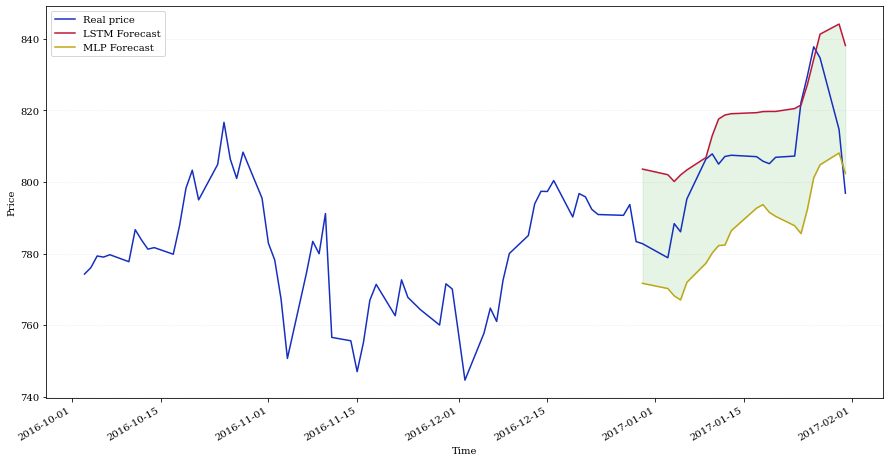

In [10]:
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams["font.family"] = "serif"
plt.grid(color='grey', linestyle=':',alpha=0.2,axis='y')
plt.plot(ALL['Date'],ALL['Open'], color='#152fbf', label = 'Real price' )
plt.plot(test['Date'],lstm_Predctions, color='#bf153a', label = 'LSTM Forecast')
plt.plot(test['Date'],mlp_Predctions, color='#bfa615', label = 'MLP Forecast')

test['lstm']=lstm_Predctions
test['mlp']=mlp_Predctions
plt.fill_between(x=test['Date'],y1=test['lstm'],y2=test['mlp'],color='#029c07',alpha=0.1)
plt.gcf().autofmt_xdate()
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()